In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**split your features and target**

In [5]:
featureCols = ['Age', 'EstimatedSalary']
targetCol = 'Purchased'

X = df[featureCols].values
y = df[targetCol].values

split your data into training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train) #fit learns rules (mean, std), transform modifies data
X_test = Scaler.transform(X_test)

In [9]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
pred = classifier.predict(X_test)

print("Actual VS Predicted")
for actual, predicted in zip(y_test[:10], pred[:10]):
    print(f"Actual: {actual} \t Predicted: {predicted}")

Actual VS Predicted
Actual: 0 	 Predicted: 0
Actual: 0 	 Predicted: 0
Actual: 0 	 Predicted: 0
Actual: 0 	 Predicted: 0
Actual: 0 	 Predicted: 0
Actual: 0 	 Predicted: 0
Actual: 0 	 Predicted: 0
Actual: 1 	 Predicted: 1
Actual: 0 	 Predicted: 0
Actual: 0 	 Predicted: 1


In [13]:

ConfMatrix = confusion_matrix(y_test, pred)
# [[TN, FP],
# [FN, TP]]

TrueNegatives = ConfMatrix[0,0]
FalsePositives = ConfMatrix[0,1]
FalseNegatives = ConfMatrix[1,0]
TruePositives = ConfMatrix[1,1]

Accuracy = accuracy_score(y_test, pred)
Precision = precision_score(y_test, pred)
Recall = recall_score(y_test, pred)
F1Score = f1_score(y_test, pred)
Specificity = TrueNegatives / (TrueNegatives + FalsePositives)

TPR = TruePositives / (TruePositives + FalseNegatives)
FPR = FalsePositives / (FalsePositives + TrueNegatives)

print("Confusion Matrix:")
print(f"True Negatives (TN): {TrueNegatives}")
print(f"False Positives (FP): {FalsePositives}")
print(f"False Negatives (FN): {FalseNegatives}")
print(f"True Positives (TP): {TruePositives}\n")

print("Derived Performance Metrics:")
print(f"Accuracy: {Accuracy:.2f}")
print(f"Precision: {Precision:.2f}")
print(f"Recall (Sensitivity / TPR): {Recall:.2f}")
print(f"F1-Score: {F1Score:.2f}")
print(f"Specificity: {Specificity:.2f}")
print(f"True Positive Rate (TPR) also Recall: {TPR:.2f}")
print(f"False Positive Rate (FPR) also opposite-side partner of Specificity: {FPR:.2f}")

Confusion Matrix:
True Negatives (TN): 65
False Positives (FP): 3
False Negatives (FN): 8
True Positives (TP): 24

Derived Performance Metrics:
Accuracy: 0.89
Precision: 0.89
Recall (Sensitivity / TPR): 0.75
F1-Score: 0.81
Specificity: 0.96
True Positive Rate (TPR) also Recall: 0.75
False Positive Rate (FPR) also opposite-side partner of Specificity: 0.04


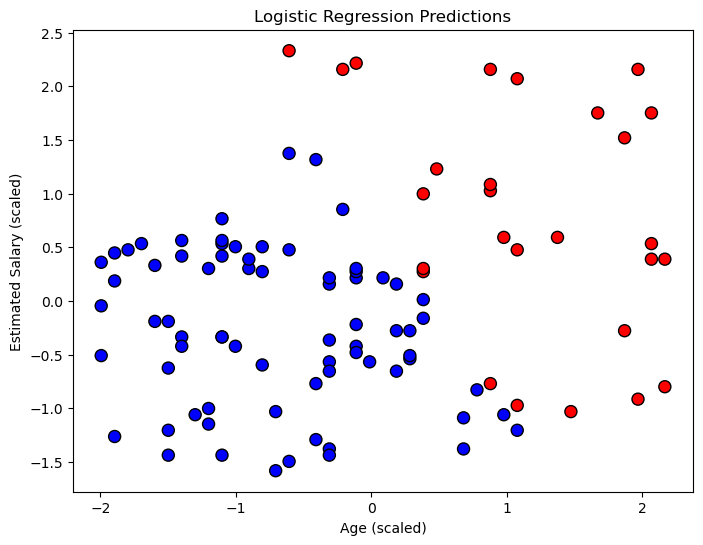

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=pred, cmap='bwr', edgecolor='k', s=75)
plt.title("Logistic Regression Predictions")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.show()

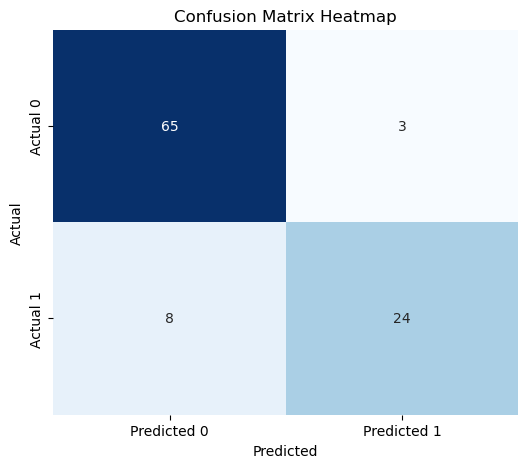

In [15]:

plt.figure(figsize=(6,5))
sns.heatmap(ConfMatrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
